In [1]:
import pandas as pd
data_train = pd.read_csv('sarcasm_mal_train.csv')
data_val = pd.read_csv('sarcasm_mal_dev.csv')
data_test = pd.read_csv('sarcasm_mal_test.csv')

In [2]:
text_train = data_train['Text']
text_val = data_val['Text']
text_test = data_test['Text']

class_label_train = data_train['labels']
class_label_val = data_val['labels']
class_label_test = data_test['labels']

In [3]:
class_label_train.value_counts(), class_label_test.value_counts(), class_label_val.value_counts()

(labels
 Non-sarcastic    10689
 Sarcastic         2499
 Name: count, dtype: int64,
 labels
 Non-sarcastic    2314
 Sarcastic         512
 Name: count, dtype: int64,
 labels
 Non-sarcastic    2305
 Sarcastic         521
 Name: count, dtype: int64)

In [4]:
import numpy as np
classes_list = ["Non-sarcastic", "Sarcastic"]
label_index_train = class_label_train.apply(classes_list.index)
label_index_val = class_label_val.apply(classes_list.index)
label_index_test = class_label_test.apply(classes_list.index)

In [5]:
import ktrain
from ktrain import text

In [6]:
MODEL_NAME = 'distilbert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=30, classes=classes_list)
trn = t.preprocess_train(np.array(text_train), np.array(class_label_train))
test = t.preprocess_test(np.array(text_test), np.array(class_label_test))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=test, batch_size=32)

c:\Users\nimmi\anaconda3\Lib\site-packages\ktrain\text\preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


preprocessing train...
language: ml
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 47


c:\Users\nimmi\anaconda3\Lib\site-packages\ktrain\utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 45


In [9]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# filepath = "malayalam_distilbert-base-multilingual-cased_save"

# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [20]:
# learner.fit_onecycle(1e-5, 10, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.84183, saving model to malayalam_distilbert-base-multilingual-cased_save
413/413 - 2196s - loss: 0.2132 - accuracy: 0.9142 - val_loss: 0.4224 - val_accuracy: 0.8418 - 2196s/epoch - 5s/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.84183 to 0.85138, saving model to malayalam_distilbert-base-multilingual-cased_save
413/413 - 1936s - loss: 0.1725 - accuracy: 0.9348 - val_loss: 0.4557 - val_accuracy: 0.8514 - 1936s/epoch - 5s/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.85138
413/413 - 1816s - loss: 0.1464 - accuracy: 0.9440 - val_loss: 0.4831 - val_accuracy: 0.8457 - 1816s/epoch - 4s/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.85138
413/413 - 1793s - loss: 0.1213 - accuracy: 0.9559 - val_loss: 0.5338 - val_accuracy: 0.8365 - 1793s/epoch - 4s/step
Epoch 5/10

Epoch 5: val_accuracy improved from 0.85138 to 0.85209, saving model t

old code

In [36]:
# learner.fit_onecycle(5e-5, 12) 



begin training using onecycle policy with max lr of 5e-05...


Epoch 1/12
413/413 [==============================] - 1980s 5s/step - loss: 0.4425 - accuracy: 0.8114 - val_loss: 0.3999 - val_accuracy: 0.8408
Epoch 2/12
413/413 [==============================] - 1858s 4s/step - loss: 0.3699 - accuracy: 0.8439 - val_loss: 0.3684 - val_accuracy: 0.8535
Epoch 3/12
413/413 [==============================] - 1865s 5s/step - loss: 0.3034 - accuracy: 0.8740 - val_loss: 0.3872 - val_accuracy: 0.8415
Epoch 4/12
413/413 [==============================] - 1834s 4s/step - loss: 0.2304 - accuracy: 0.9122 - val_loss: 0.4444 - val_accuracy: 0.8224
Epoch 5/12
413/413 [==============================] - 2184s 5s/step - loss: 0.1714 - accuracy: 0.9334 - val_loss: 0.5655 - val_accuracy: 0.8422
Epoch 6/12
413/413 [==============================] - 1863s 5s/step - loss: 0.1391 - accuracy: 0.9479 - val_loss: 0.5216 - val_accuracy: 0.8471
Epoch 7/12
413/413 [==============================] - 1834s 4s/step - loss: 0.1021 - accuracy: 0.9636 - val_loss: 0.6472 - val_accuracy:

In [ ]:
# learner.validate(class_names=t.get_classes()) 

In [37]:
# learner.validate(class_names=t.get_classes()) 

89/89 [==============================] - 123s 1s/step
               precision    recall  f1-score   support

Non-sarcastic       0.88      0.94      0.91      2305
    Sarcastic       0.62      0.41      0.50       521

     accuracy                           0.85      2826
    macro avg       0.75      0.68      0.70      2826
 weighted avg       0.83      0.85      0.83      2826



array([[2173,  132],
       [ 306,  215]], dtype=int64)

In [7]:
filepath = "malayalam_distilbert-base-multilingual-cased_save"
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(text_test.values)

89/89 [==============================] - 138s 1s/step
               precision    recall  f1-score   support

Non-sarcastic       0.88      0.94      0.91      2314
    Sarcastic       0.59      0.41      0.48       512

     accuracy                           0.84      2826
    macro avg       0.73      0.67      0.69      2826
 weighted avg       0.82      0.84      0.83      2826



kam train hua model

In [11]:
# model.load_weights(filepath)

# learner.validate(class_names=t.get_classes())

# predictor = ktrain.get_predictor(learner.model, preproc=t)

# predict = predictor.predict(text_test.values)

89/89 [==============================] - 59s 623ms/step
               precision    recall  f1-score   support

Non-sarcastic       0.87      0.98      0.92      2314
    Sarcastic       0.82      0.31      0.45       512

     accuracy                           0.86      2826
    macro avg       0.84      0.65      0.68      2826
 weighted avg       0.86      0.86      0.84      2826



In [8]:
from keras.utils import to_categorical
predicted_prob = predictor.predict_proba(text_test.values)
label_test = to_categorical(np.asarray(label_index_test))

In [9]:
from sklearn.metrics import classification_report
print(classification_report(label_index_test ,predicted_prob.argmax(axis = 1), target_names=predictor.get_classes()))

               precision    recall  f1-score   support

Non-sarcastic       0.88      0.95      0.91      2314
    Sarcastic       0.64      0.43      0.51       512

     accuracy                           0.85      2826
    macro avg       0.76      0.69      0.71      2826
 weighted avg       0.84      0.85      0.84      2826



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()

    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = predictor.get_classes()
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[2189  125]
 [ 293  219]]
Normalized confusion matrix
[[0.94598099 0.05401901]
 [0.57226562 0.42773438]]


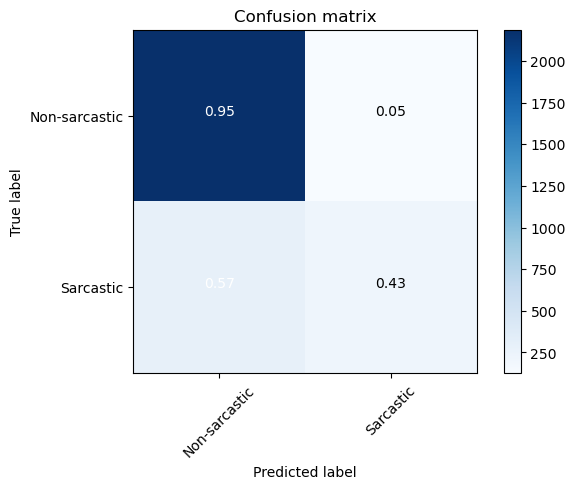

C:\Users\nimmi\AppData\Local\Temp\ipykernel_24228\1043266180.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


<Figure size 640x480 with 0 Axes>

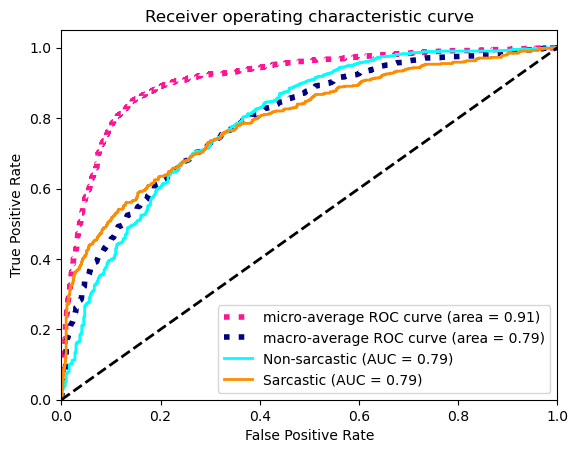

In [12]:
from sklearn import metrics
plt.clf()
cnf_matrix = metrics.confusion_matrix(label_index_test, predicted_prob.argmax(axis = 1))
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes = predictor.get_classes(), normalize = True)
plt.show()
# plt.savefig("confusion_roberta.pdf", format = 'pdf', dpi =1000)

plt.clf()
plot_AUC_ROC(label_test, predicted_prob)
plt.savefig("ROC_AUC_distilbert_mal.pdf", format = 'pdf', dpi =1000)


In [13]:
y_pred = predicted_prob.argmax(axis = 1)
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate precision, recall, F1 score
precision, recall, f1, _ = precision_recall_fscore_support(label_index_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8375038505319738
Recall: 0.8520877565463553
F1 Score: 0.8401636267971145


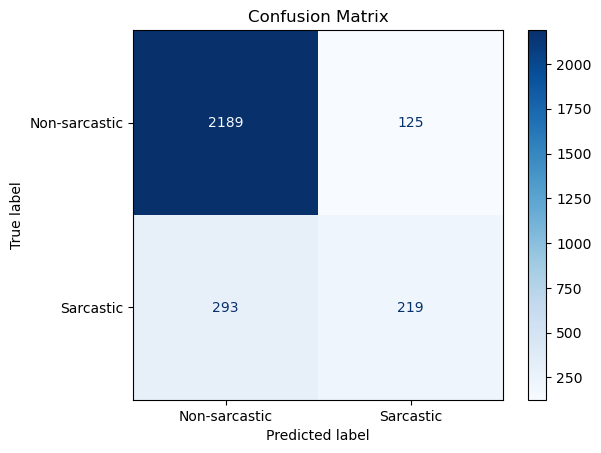

<Figure size 640x480 with 0 Axes>

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(class_label_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_list)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
plt.savefig("confusion_ditilbert_mal.pdf", format = 'pdf', dpi =1000)